In [10]:
# This cell imports all required libraries:

# NumPy for numerical operations

# Matplotlib for plotting images

# TensorFlow/Keras for building and training neural networks
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf


In [11]:
# This cell loads the MNIST dataset, which contains handwritten digits (0–9).
# The dataset includes:

# Training images and labels

# Test images and labels
(x, y), (x_test_unused, y_test_unused) = mnist.load_data()

In [12]:
x_all.shape

(60000, 28, 28)

In [13]:
y_all.shape

(60000,)

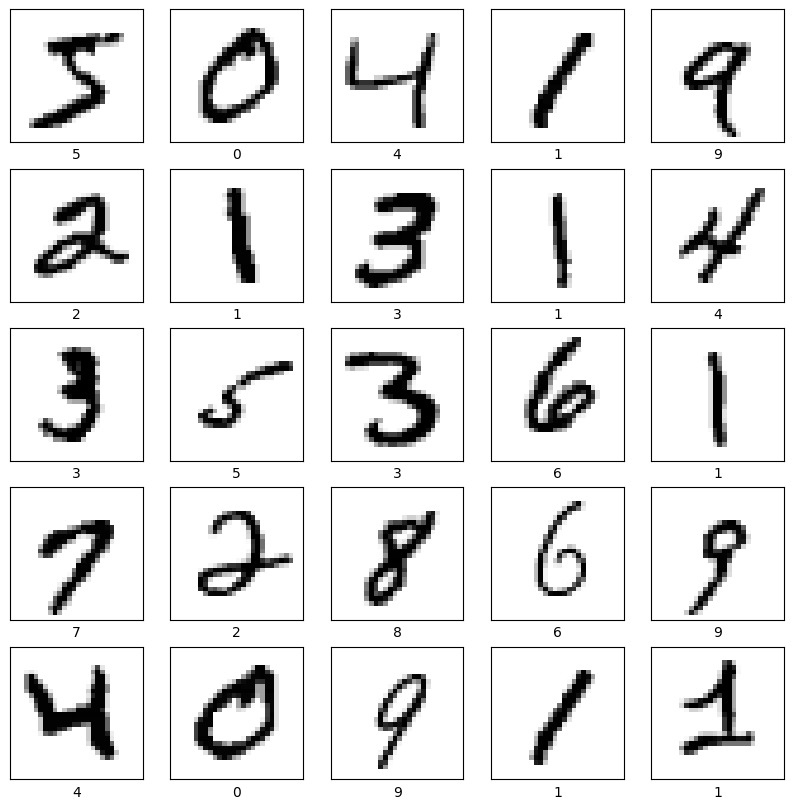

In [14]:
# This cell displays a 5×5 grid of example MNIST digits.
# Purpose:

# To confirm the dataset loaded correctly

# To understand how the images look
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i].squeeze(), cmap=plt.cm.binary)  # squeeze if shape is (28,28,1)
    plt.xlabel(y[i])
plt.show()


In [18]:
# Combine original train and test datasets into a single dataset
# This allows us to perform preprocessing first and then manually split the data later
# np.concatenate joins the arrays along the first axis (axis=0), stacking samples vertically
# Result:
#   x_all -> all images combined (70000, 28, 28)
#   y_all -> corresponding labels combined (70000,)

x_all = np.concatenate((x, x_test_unused), axis=0)
y_all = np.concatenate((y, y_test_unused), axis=0)

In [19]:
print("Original full dataset shape:", x_all.shape)

Original full dataset shape: (70000, 28, 28)


In [20]:
# Normalize image pixel values to the range [0, 1]
# Original MNIST images have pixel values in the range 0-255
# Dividing by 255 converts them to floating-point numbers between 0 and 1
# This helps the neural network train faster and improves stability

x_all = x_all / 255.0

In [21]:
# Define function to add channel dimension for CNN input

def add_channel_dimension(x, height=28, width=28, channels=1):
    return x.reshape((x.shape[0], height, width, channels))


In [22]:
# Reshape x_all to add channel dimension for CNN input
# Original shape: (samples, 28, 28)
# After reshape: (samples, 28, 28, 1)
# Verify the reshaped shape

x_all_reshaped = add_channel_dimension(x_all)
print("After reshaping:", x_all_reshaped.shape)


After reshaping: (70000, 28, 28, 1)


In [23]:
# Split dataset into training and testing sets
# 80% training, 20% testing
# random_state=42 ensures reproducibility
# x_all_reshaped -> preprocessed images with channel dimension
# y_all          -> corresponding labels

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_all_reshaped, y_all, test_size=0.2, random_state=42
)

In [24]:
x_train.shape

(56000, 28, 28, 1)

In [25]:
y_train.shape

(56000,)

In [26]:
x_test.shape

(14000, 28, 28, 1)

In [27]:
y_test.shape

(14000,)

In [28]:
# Define a fully connected neural network (MLP) for MNIST classification
# Layers:
#   Flatten -> converts 28x28 images to 1D vector
#   Dense   -> 512 and 256 neurons with ReLU activation + L2 regularization
#   Dropout -> 0.2 to reduce overfitting
#   Output Dense -> 10 neurons with softmax for digit classification (0-9)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


model = Sequential([
    Flatten(input_shape=(28, 28, 1)),


    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.2),


    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.2),


    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compile the model for training
# Optimizer: Adam (adaptive learning rate)
# Loss: SparseCategoricalCrossentropy for integer labels (0-9)
# from_logits=False because output layer uses softmax
# Metric: accuracy to track performance

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [30]:
# Train the model with early stopping
# EarlyStopping monitors validation loss ('val_loss')
# patience=3 -> stop training if val_loss doesn't improve for 3 epochs
# restore_best_weights=True -> revert to weights with lowest val_loss
# history stores training metrics (loss, accuracy) for plotting

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=early_stopping)


Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8851 - loss: 0.4569 - val_accuracy: 0.9648 - val_loss: 0.1970
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9651 - loss: 0.1965 - val_accuracy: 0.9689 - val_loss: 0.1920
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9714 - loss: 0.1775 - val_accuracy: 0.9714 - val_loss: 0.1886
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9747 - loss: 0.1681 - val_accuracy: 0.9765 - val_loss: 0.1684
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.1585 - val_accuracy: 0.9777 - val_loss: 0.1645
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9778 - loss: 0.1587 - val_accuracy: 0.9731 - val_loss: 0.1742
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9778 - loss: 0.1515 - val_accuracy: 0.9755 - val_loss: 0.1705
Epoch 8/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.1449 

In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9799 - loss: 0.1488
Test Accuracy: 0.9807142615318298


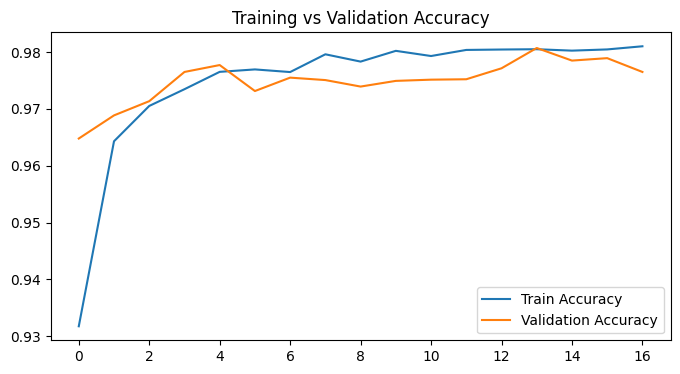

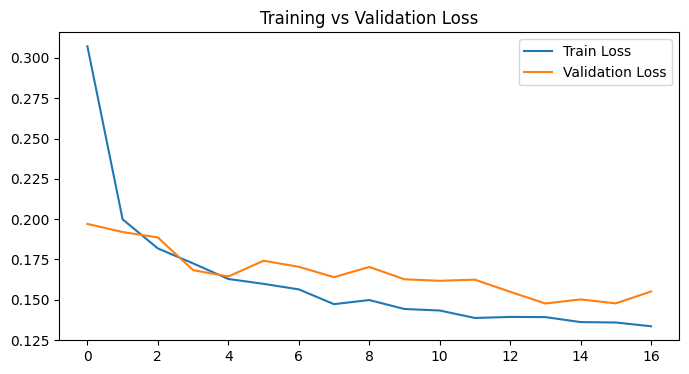

In [32]:
# Visualize training performance
# First plot: Training vs Validation Accuracy
# Second plot: Training vs Validation Loss
# Helps to check for overfitting, underfitting, and model convergence

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [33]:
# Define a Convolutional Neural Network (CNN) for MNIST digit classification
# Layers:
#   Conv2D + ReLU + BatchNormalization -> feature extraction
#   MaxPooling2D -> reduce spatial dimensions
#   Flatten -> convert 2D features to 1D vector
#   Dense + ReLU + Dropout -> fully connected layers with regularization
#   Output Dense(10) -> raw scores (logits) for 10 classes
# EarlyStopping monitors validation loss to prevent overfitting

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),


    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(10)
])




early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [36]:
# Compile CNN with Adam optimizer and SparseCategoricalCrossentropy loss
# from_logits=True because output layer does not have softmax
# Metric: accuracy
# Train the model for 50 epochs with early stopping
# Validation data used to monitor performance and stop early if val_loss stops improving
# Training history stored in 'history' for plotting metrics later

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9123 - loss: 0.2903 - val_accuracy: 0.9748 - val_loss: 0.0875
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9799 - loss: 0.0719 - val_accuracy: 0.9809 - val_loss: 0.0685
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0485 - val_accuracy: 0.9824 - val_loss: 0.0552
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9878 - loss: 0.0420 - val_accuracy: 0.9885 - val_loss: 0.0428
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9905 - loss: 0.0313 - val_accuracy: 0.9894 - val_loss: 0.0444
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9870 - val_loss: 0.0590
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 4.


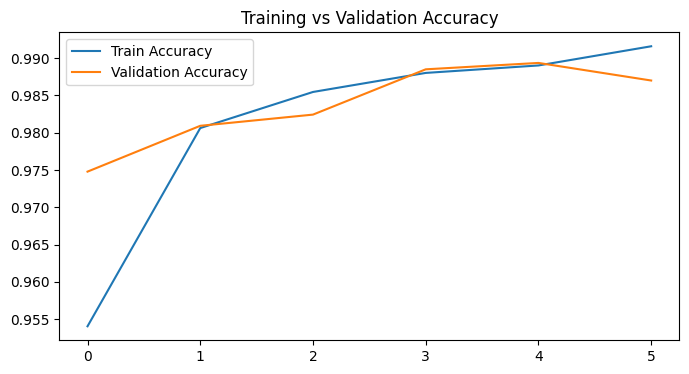

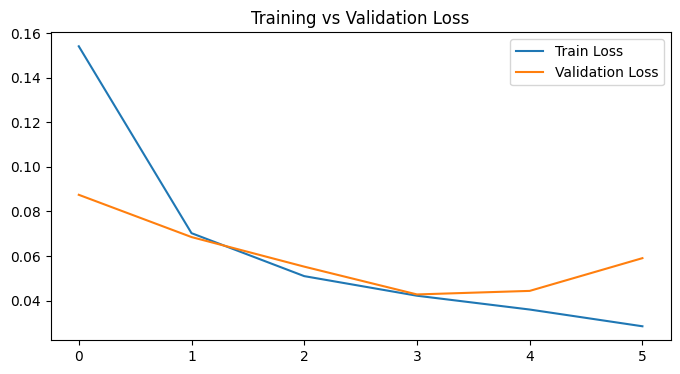

In [37]:
# Visualize CNN training performance
# First plot: Training vs Validation Accuracy
# Second plot: Training vs Validation Loss
# Helps to check overfitting, underfitting, and model convergence

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [38]:
est_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"\nFinal Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")



438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0421

Final Test Loss: 0.1477
Final Test Accuracy: 0.9885
